# AutoCorrelation

Calculate autocorrelation measures on time series.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_combined

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims

## Settings

In [6]:
# Simulation settings
n_seconds = 10
fs = 1000

# Collect together simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}
sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs, 
                   'components' : {'sim_powerlaw' : {}, 'sim_oscillation' : {'freq' : 10}}, 
                   'component_variances' : [1, 0.25]}

# Settings for autocorrelations
ac_measure_params = {'max_lag' : 250, 'lag_step' : 1}

# Set the number of instances to run
n_instances = 10

# Set the range of exponents to explore
exps = np.arange(-3, 0.5, 0.5)

### Calculating AutoCorrelation

In [7]:
# Set a test exponent value
exp = -2

In [8]:
# Simulate a powerlaw signal
sig = sim_powerlaw(n_seconds, fs, exponent=exp)

In [9]:
# Calculate autocorrelation
times, sig_acs = autocorr(sig, **ac_measure_params)

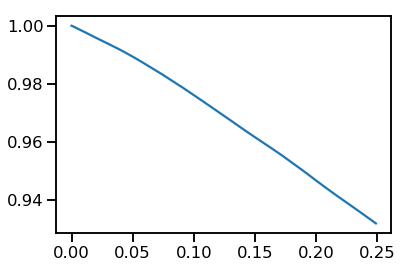

In [10]:
# Plot the autocorrelation across time delays
plt.plot(times/fs, sig_acs)

## Powerlaw Signals

In [11]:
# Run a set of simulations, calculating autocorrelation across exponents
acs = run_sims(sim_powerlaw, sim_params_pow, autocorr_wrapper, ac_measure_params,
               update='update_exp', values=exps, n_instances=n_instances)
acs = np.array(acs)

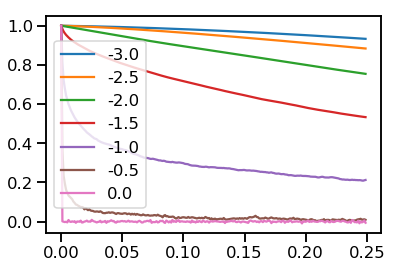

In [12]:
# Plot autocorrelation across exponent values
for ac, exp in zip(acs, exps):
    plt.plot(times/fs, ac, label=exp)
plt.legend();

## Powerlaw Signals with Oscillations

In [13]:
# Run a set of simulations, calculating autocorrelation across exponents, with an oscillation
acs = run_sims(sim_combined, sim_params_comb, autocorr_wrapper, ac_measure_params,
               update='update_comb_exp', values=exps, n_instances=n_instances)
acs = np.array(acs)

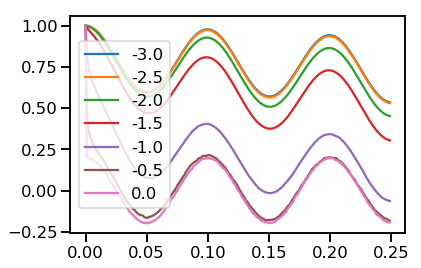

In [14]:
# Plot autocorrelation across exponent values
for ac, exp in zip(acs, exps):
    plt.plot(times/fs, ac, label=exp)
plt.legend();

## AutoCorr Funcs

In [4]:
def autocorr_wrapper(sig, **kwargs):
    return autocorr(sig, **kwargs)[1]

In [5]:
def autocorr(data, max_lag=1000, lag_step=1):
    """ Calculate the signal autocorrelation (lagged correlation)
    
    Parameters
    ----------
    data : array 1D
        Time series to compute autocorrelation over.
    max_lag : int (default=1000)
        Maximum delay to compute AC, in samples of signal.
    lag_step : int (default=1)
        Step size (lag advance) to move by when computing correlation.
    
    Returns
    -------
    AC_timepoints : array, 1D
        Time points (in samples) at which correlation was computed.
    AC : array, 1D
        Time lagged (auto)correlation.
    """
    
    AC_timepoints = np.arange(0, max_lag, lag_step)
    AC = np.zeros(len(AC_timepoints))
    AC[0] = np.sum((data - np.mean(data))**2)
    
    for ind, lag in enumerate(AC_timepoints[1:]):
        AC[ind + 1] = np.sum((data[:-lag] - np.mean(data[:-lag]))
                             * (data[lag:] - np.mean(data[lag:])))

    return AC_timepoints, AC / AC[0]